# Load library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load dataset

In [10]:
iris = datasets.load_iris()

In [11]:
X = iris.data[:, 2:4]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [13]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

# Spliting data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [18]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 2)
X_test.shape = (45, 2)


# Standardized Data

In [20]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)

In [21]:
X_test_t = scaler.transform(X_test)

# Train model

In [23]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [24]:
## setting hyper parameters
params = {
 'n_neighbors': 3,
 'p' : 2,
 'algorithm' : 'auto'
}

In [28]:
## fitting model
model = KNeighborsClassifier(**params)
model.fit(X_train_t, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
## predict
y_pred = model.predict(X_test_t)
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [32]:
## Miss Classified
sumMiss = (y_pred != y_test).sum()
print(f'Miss Classified = {sumMiss}')

Miss Classified = 0


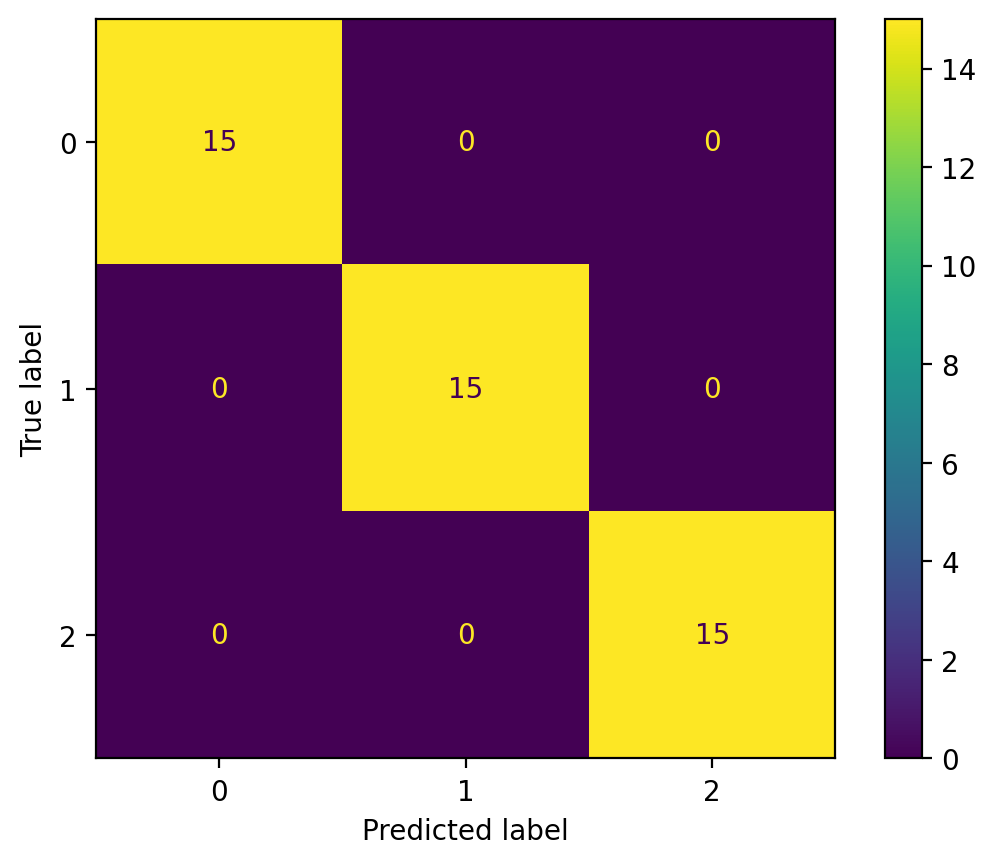

In [34]:
## Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm).plot()

In [35]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



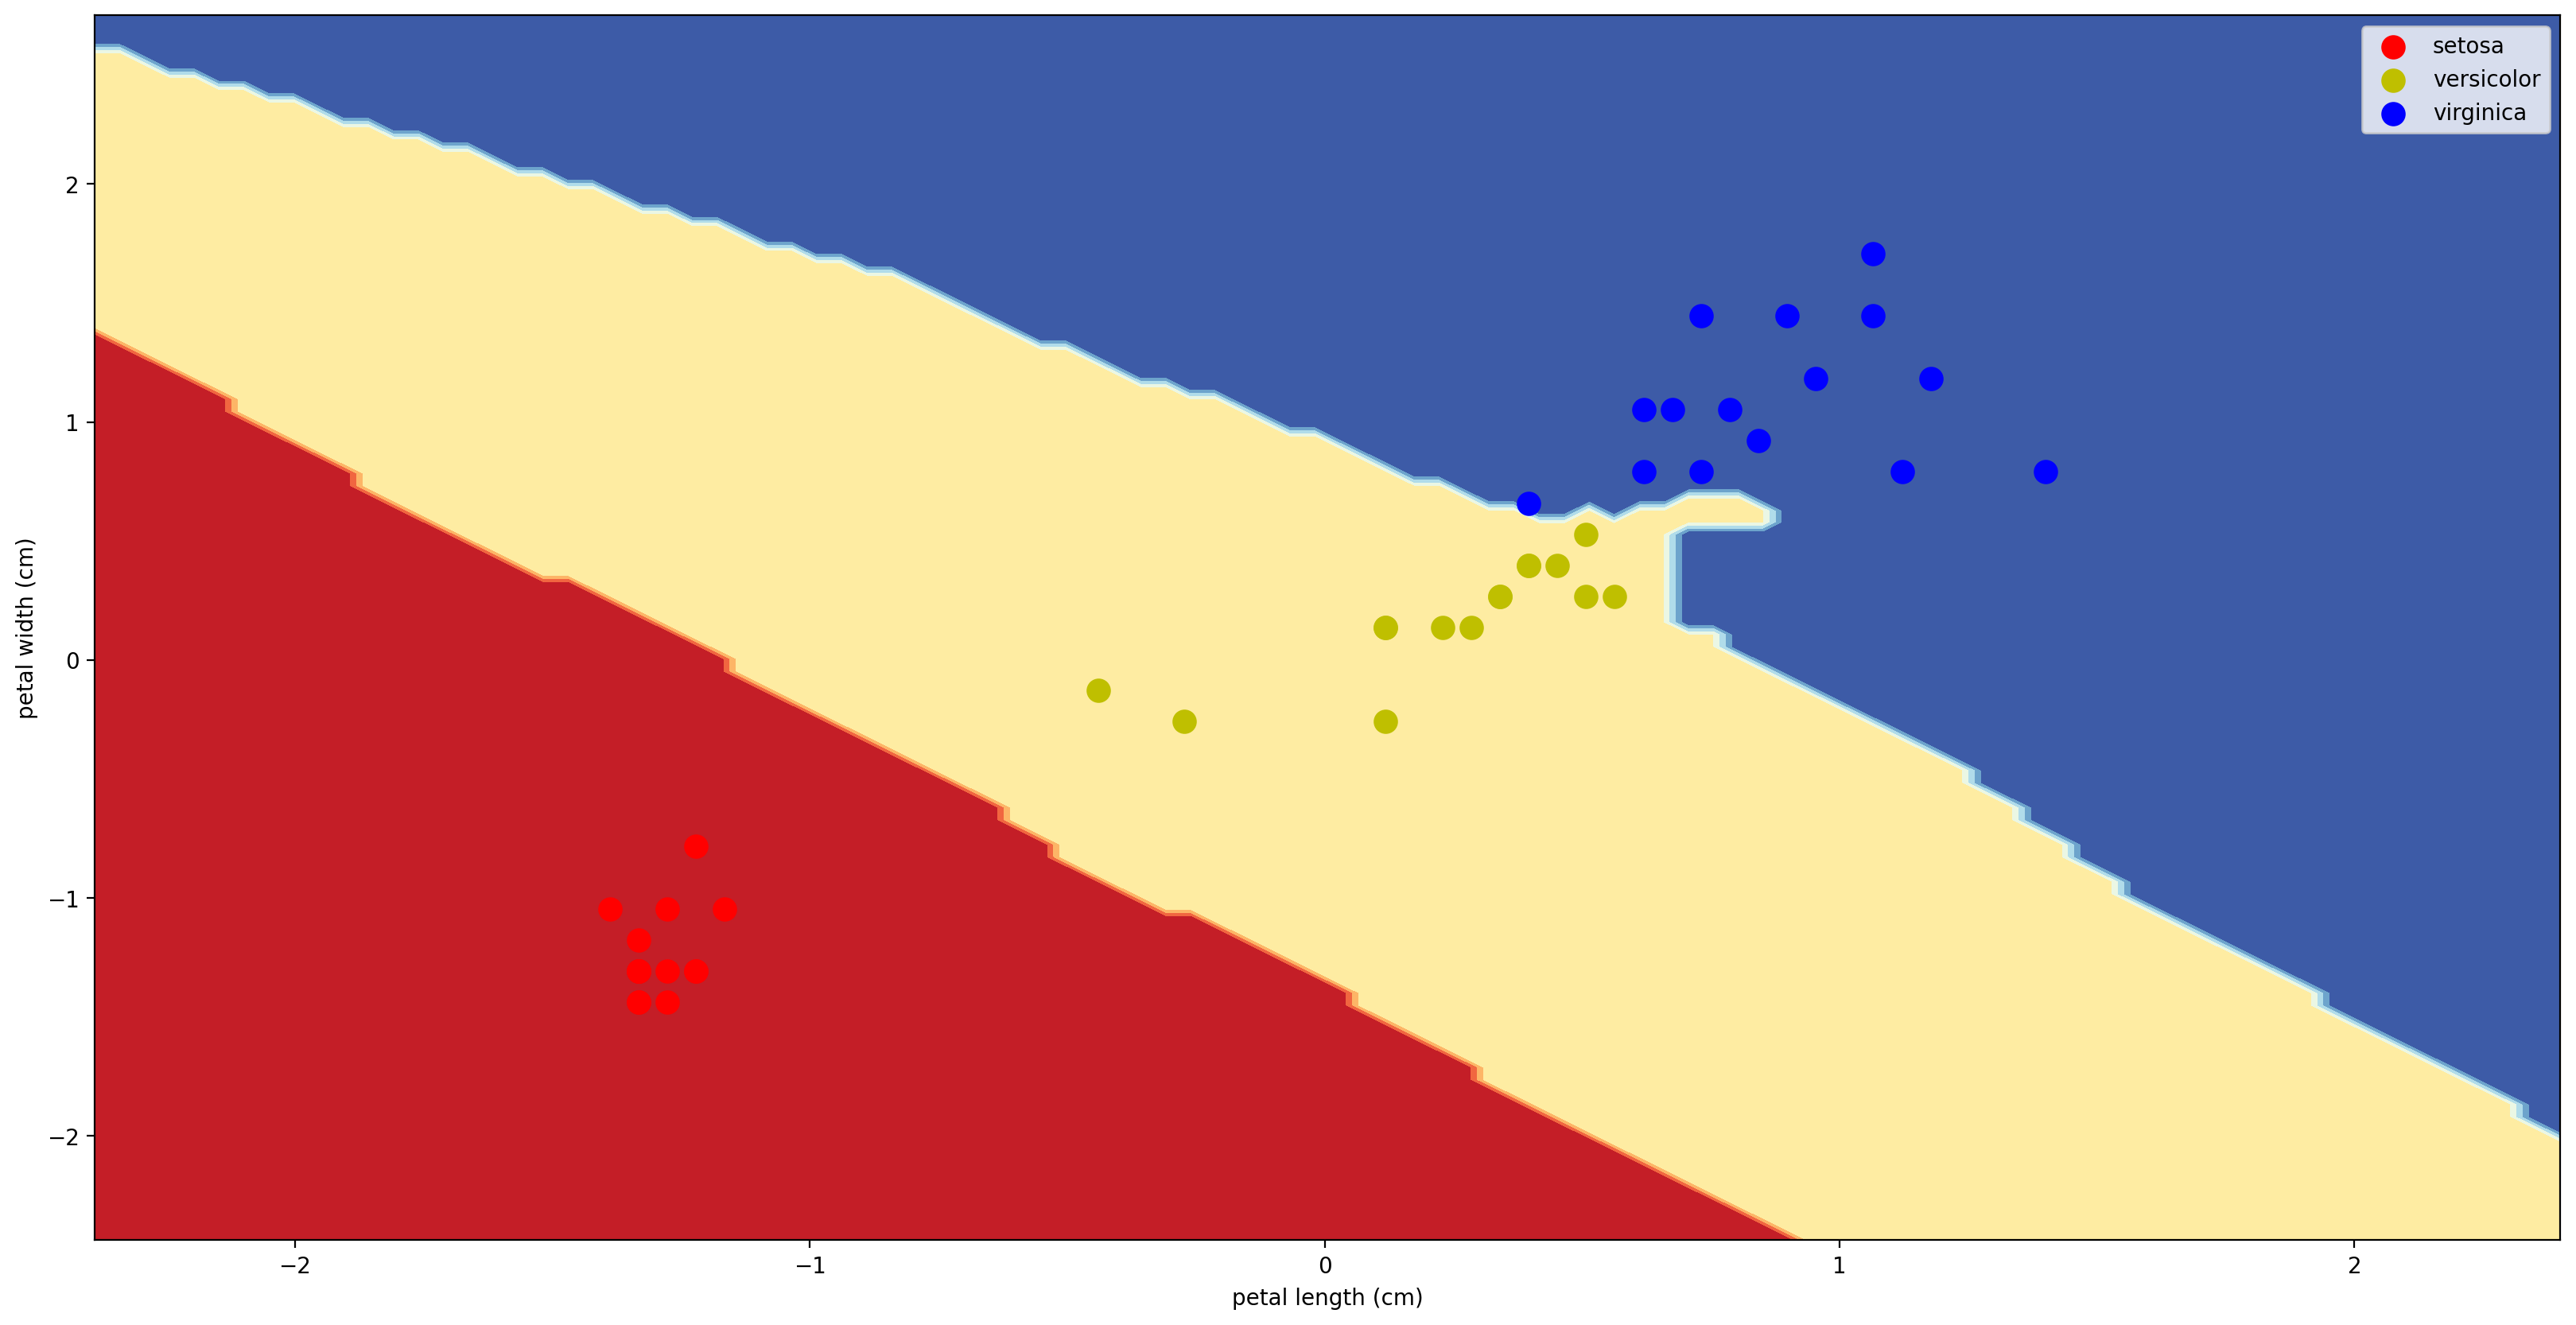

In [57]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1, 1, figsize = (20, 10))

DecisionBoundaryDisplay.from_estimator(
    model,
    X_test_t,
    cmap=plt.cm.RdYlBu,
    response_method='predict',
    xlabel= iris.feature_names[2],
    ylabel= iris.feature_names[3],
    ax = ax
)

color = 'ryb'
for i, c in zip(range(3), color):
    idx = np.where(y_pred == i)
    plt.scatter(
        X_test_t[idx, 0],
        X_test_t[idx, 1],
        s = 100,
        c = c,
        label = iris.target_names[i]
    )
    
plt.legend();

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
def surf_plot(X_train = X_train_t, X_test = X_test_t, model = model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    item = [(X_train, y_train_pred, 'Train Data'), (X_test, y_test_pred, 'Test Data')]
    
    fig, ax = plt.subplots(1, 2, figsize = (20,10))
    
    for p, e in enumerate(item):
        DecisionBoundaryDisplay.from_estimator(
            model,
            e[0],
            cmap=plt.cm.RdYlBu,
            response_method='predict',
            xlabel= iris.feature_names[2],
            ylabel= iris.feature_names[3],
            ax = ax[p]
        )

        color = 'ryb'
        for i, c in zip(range(3), color):
            idx = np.where(e[1] == i)
            ax[p].scatter(
                e[0][idx, 0],
                e[0][idx, 1],
                s = 100,
                c = c,
                label = iris.target_names[i]
            )
        ax[p].set_title(f'{e[2]}')
        ax[p].legend();
        

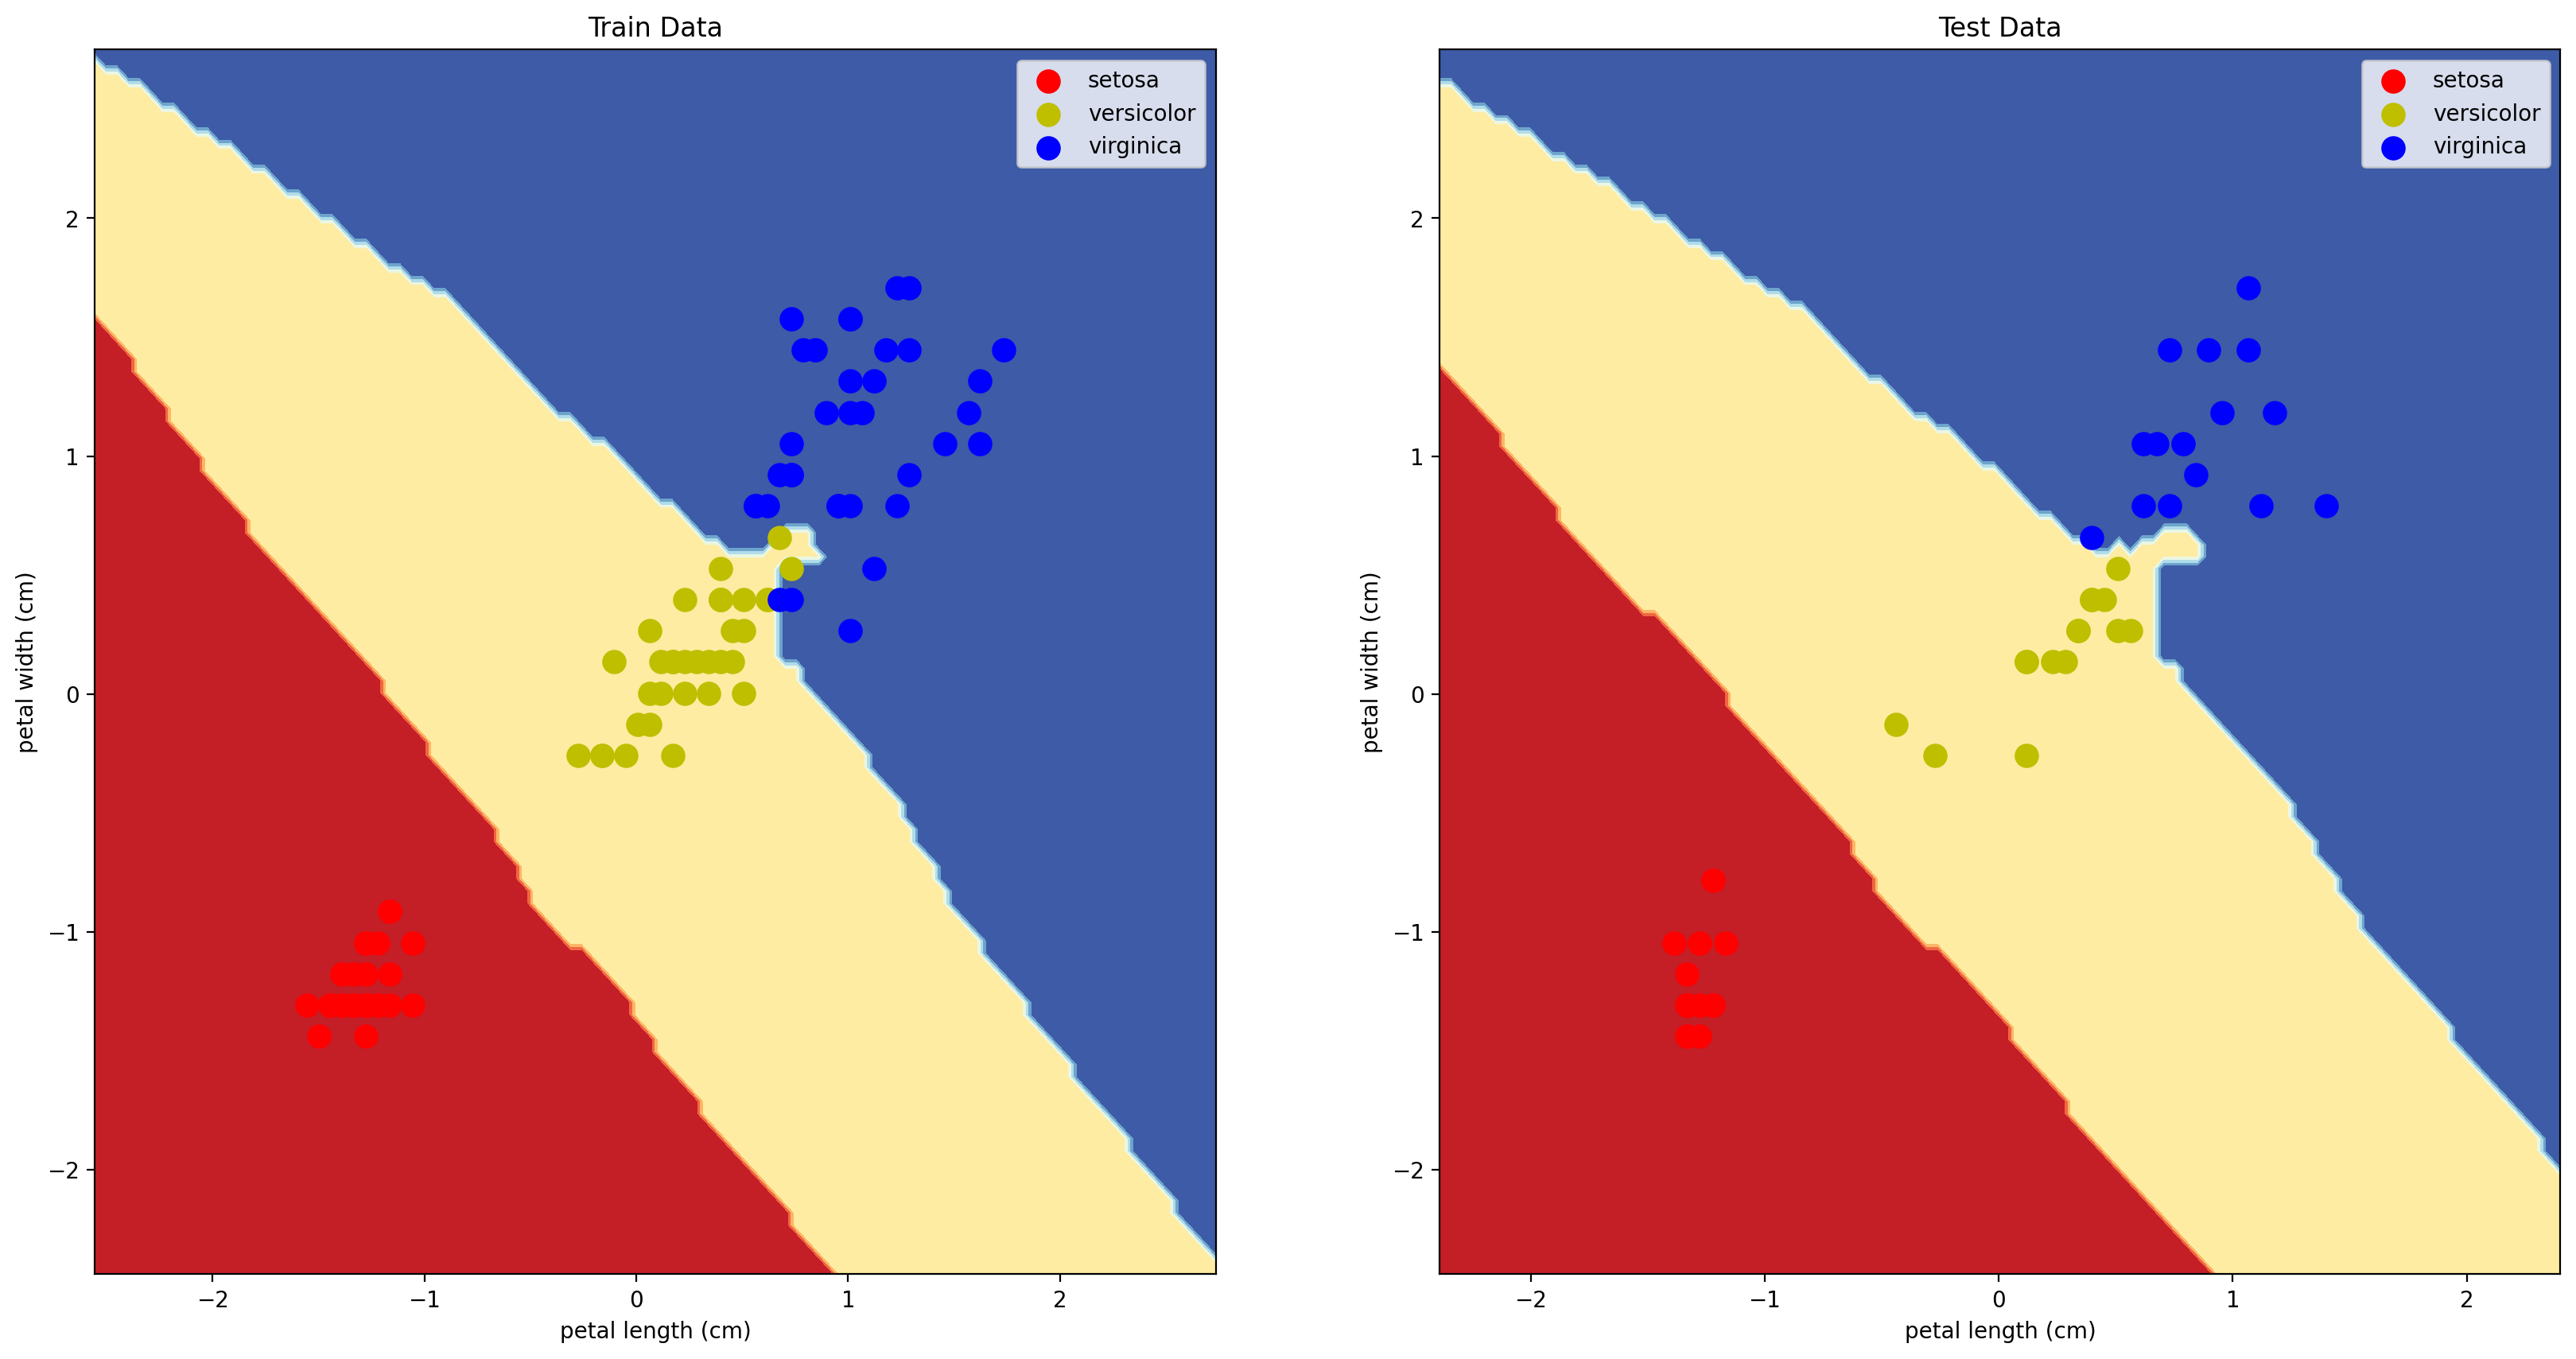

In [100]:
surf_plot()

In [103]:
## setting hyper parameters
params_set = (
    ("params1" , {
     'n_neighbors': 5,
     'p' : 2,
     'algorithm' : 'auto'
    }),

    ("params2" , {
     'n_neighbors': 10,
     'p' : 2,
     'algorithm' : 'auto'
    }),

    ('params3' , {
     'n_neighbors': 15,
     'p' : 2,
     'algorithm' : 'auto'
    }),

    ("params4" , {
     'n_neighbors': 20,
     'p' : 2,
     'algorithm' : 'auto'
    }),

    ('params5' , {
     'n_neighbors': 30,
     'p' : 2,
     'algorithm' : 'auto'
    })
)

n_neighbors = 5 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

----------------------------------------------------------------------------------------------------
n_neighbors = 10 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

----------------------------------------------------------------------------------------------------

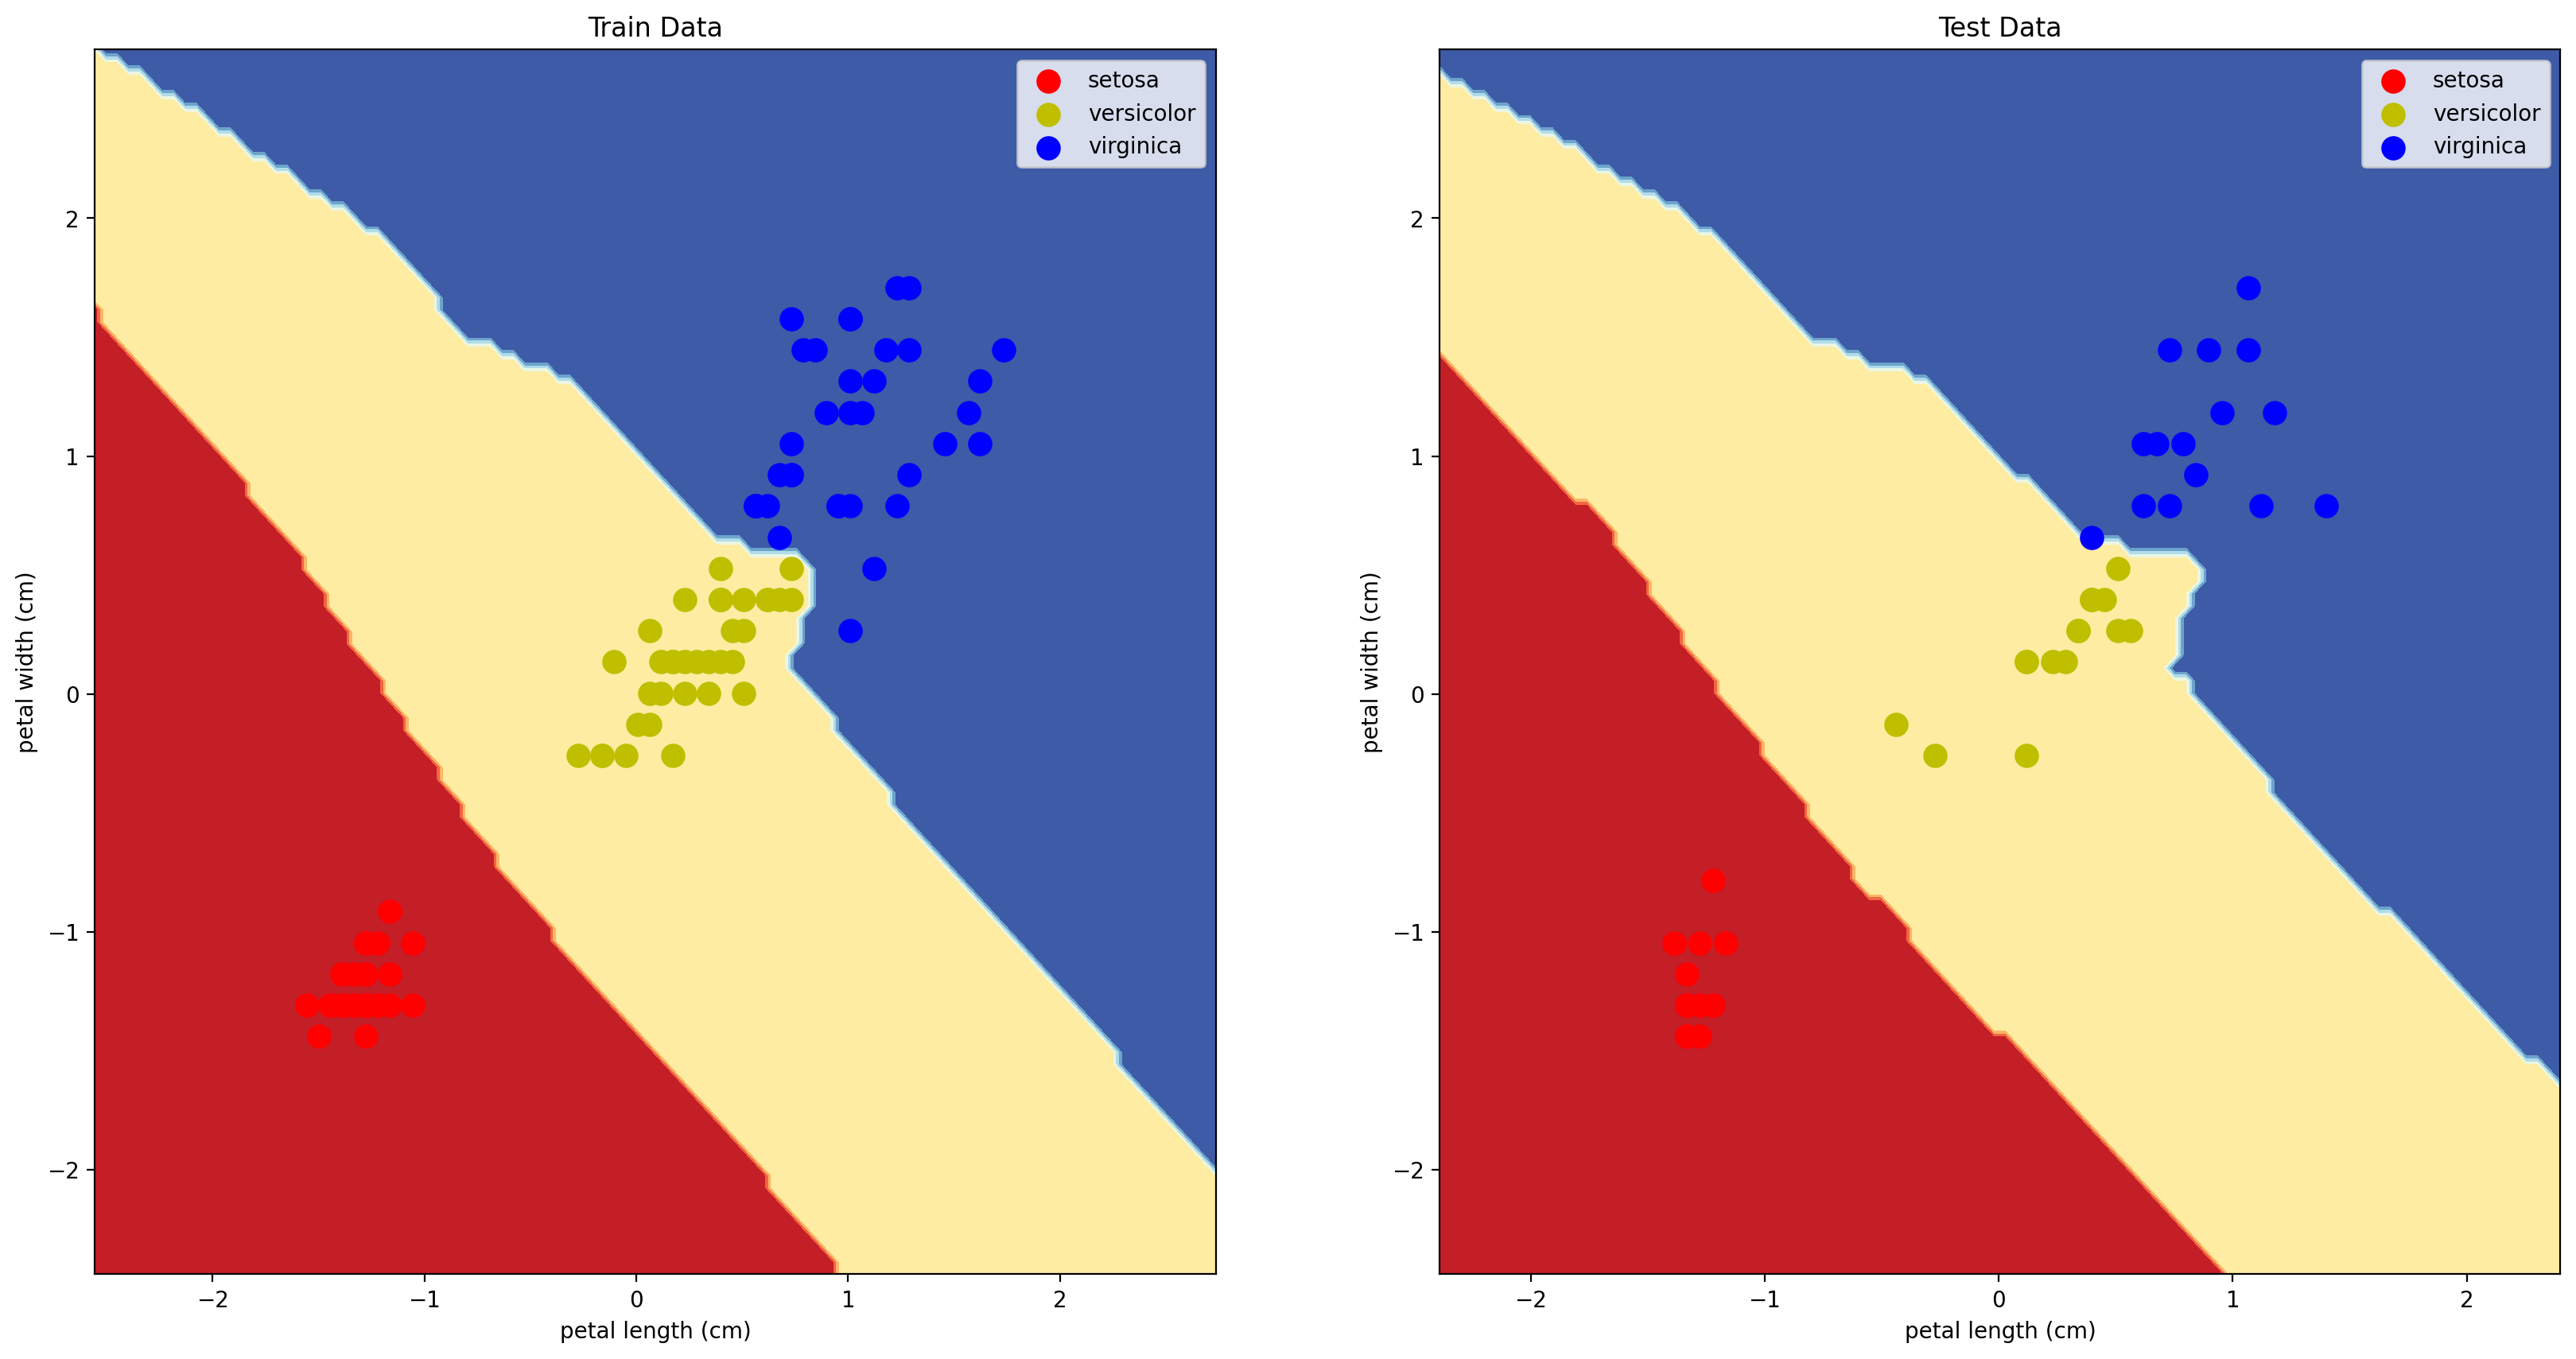

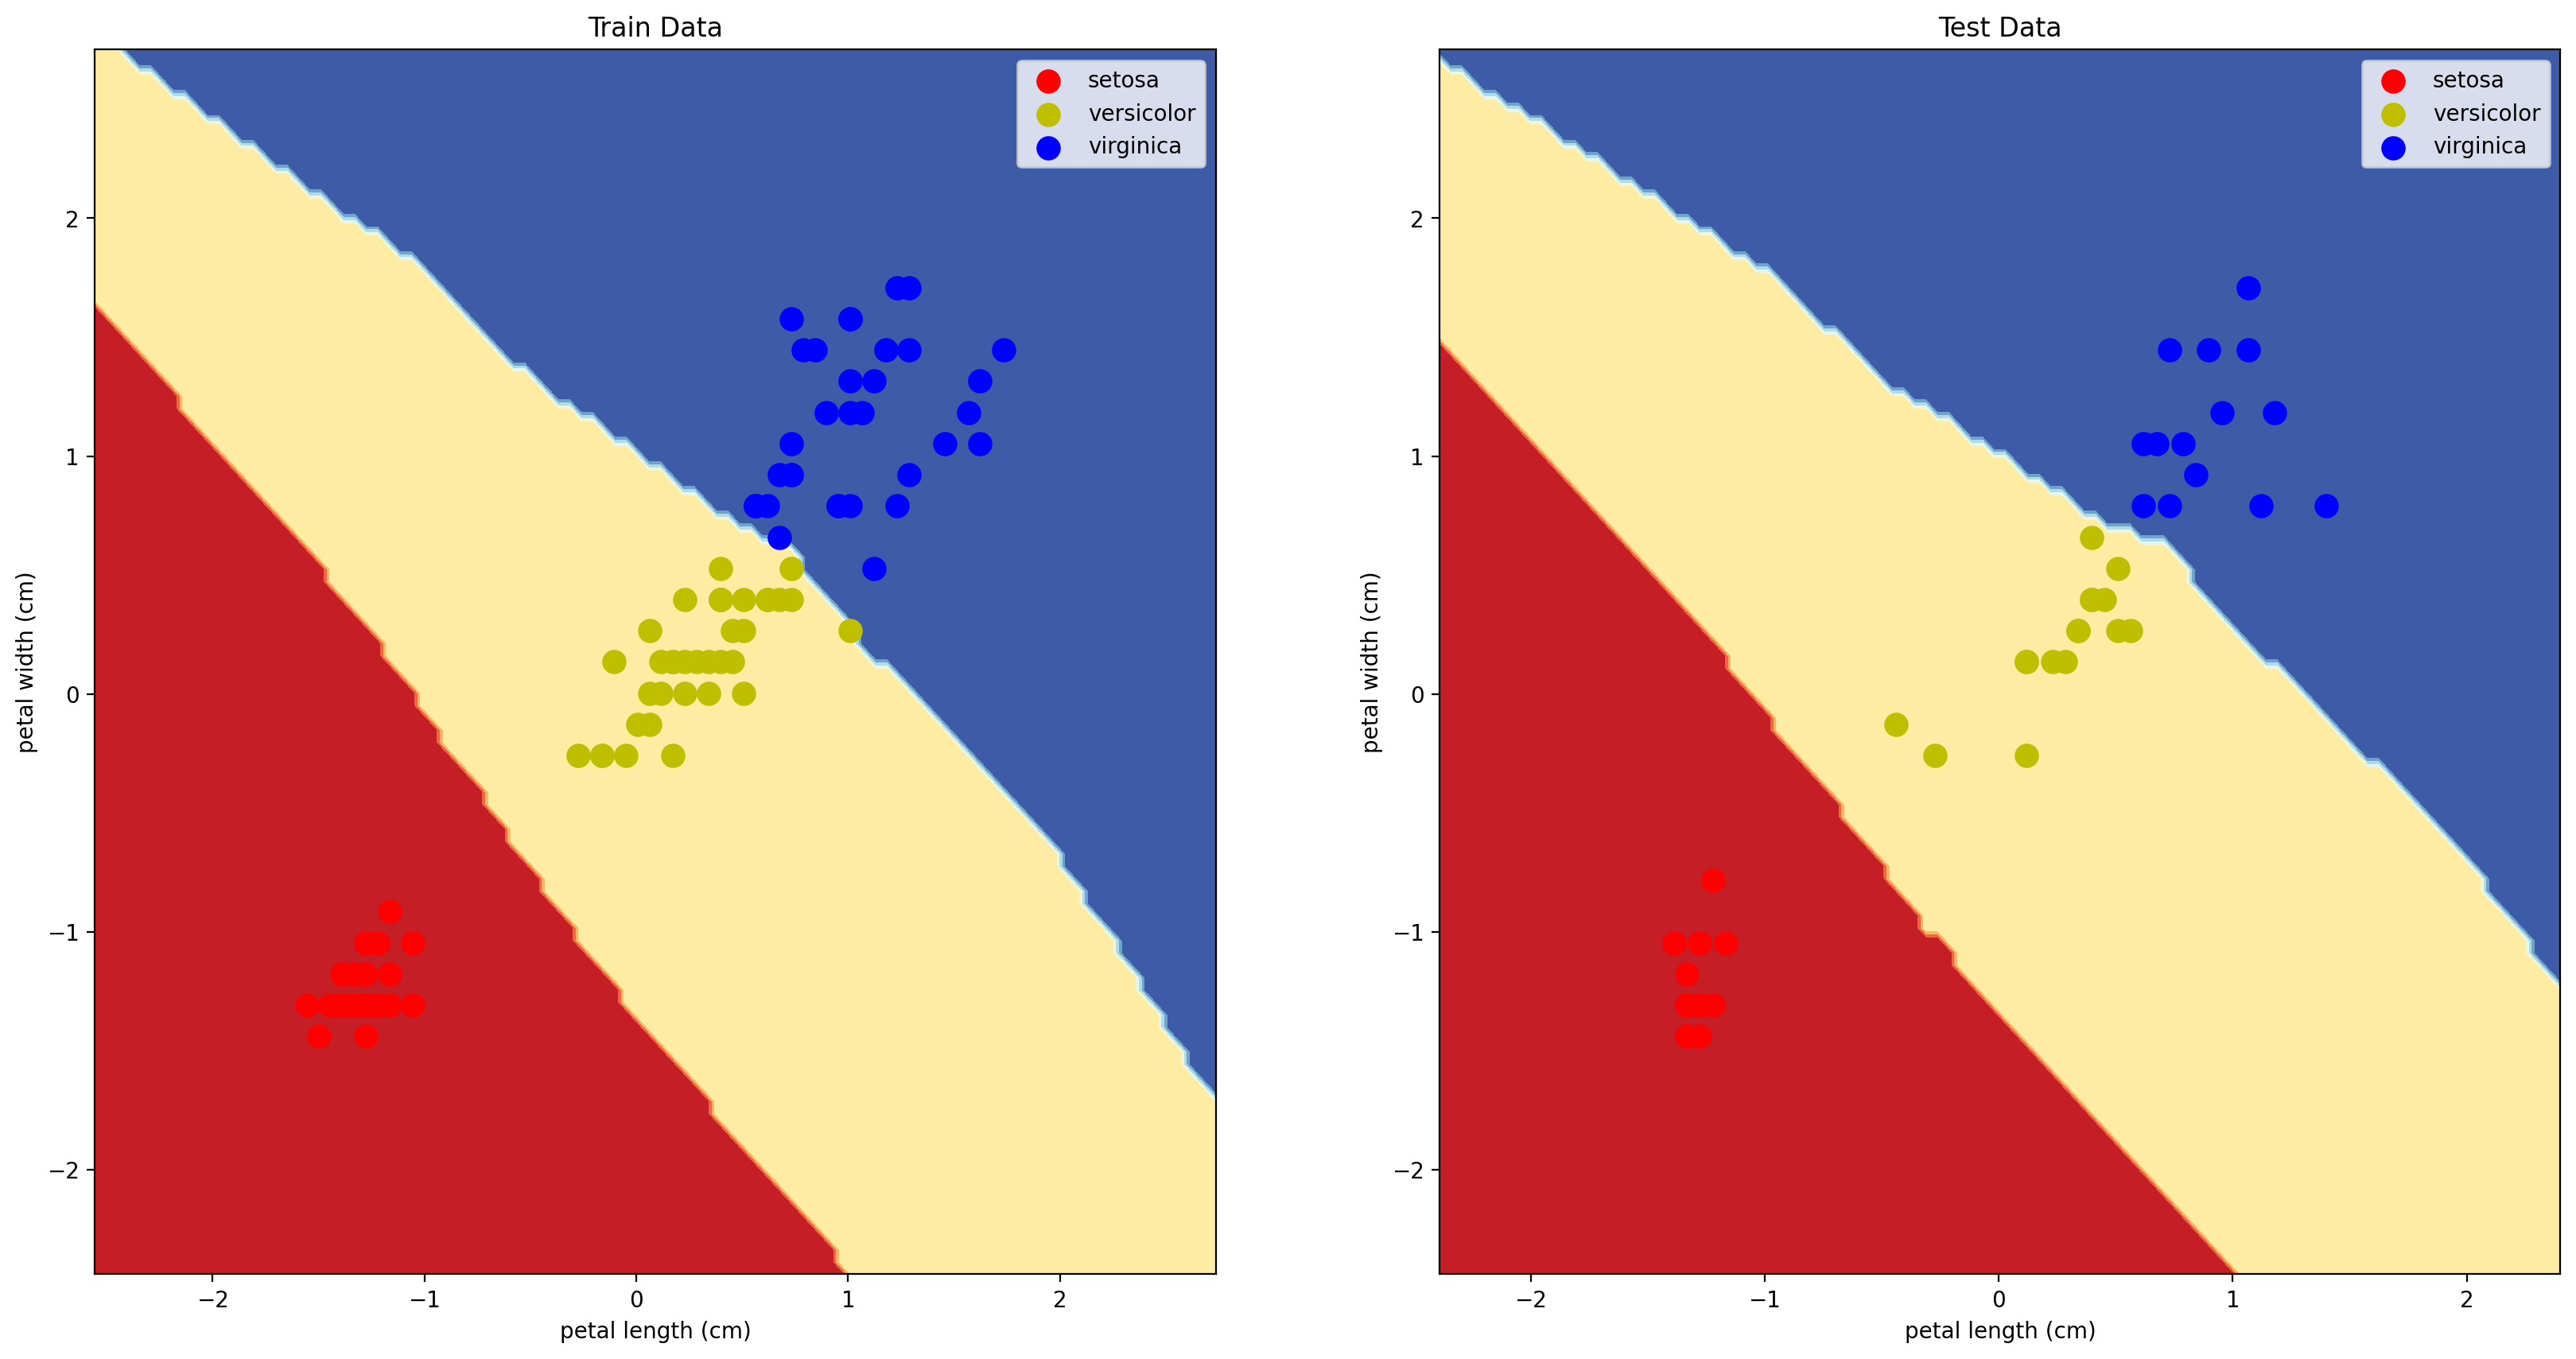

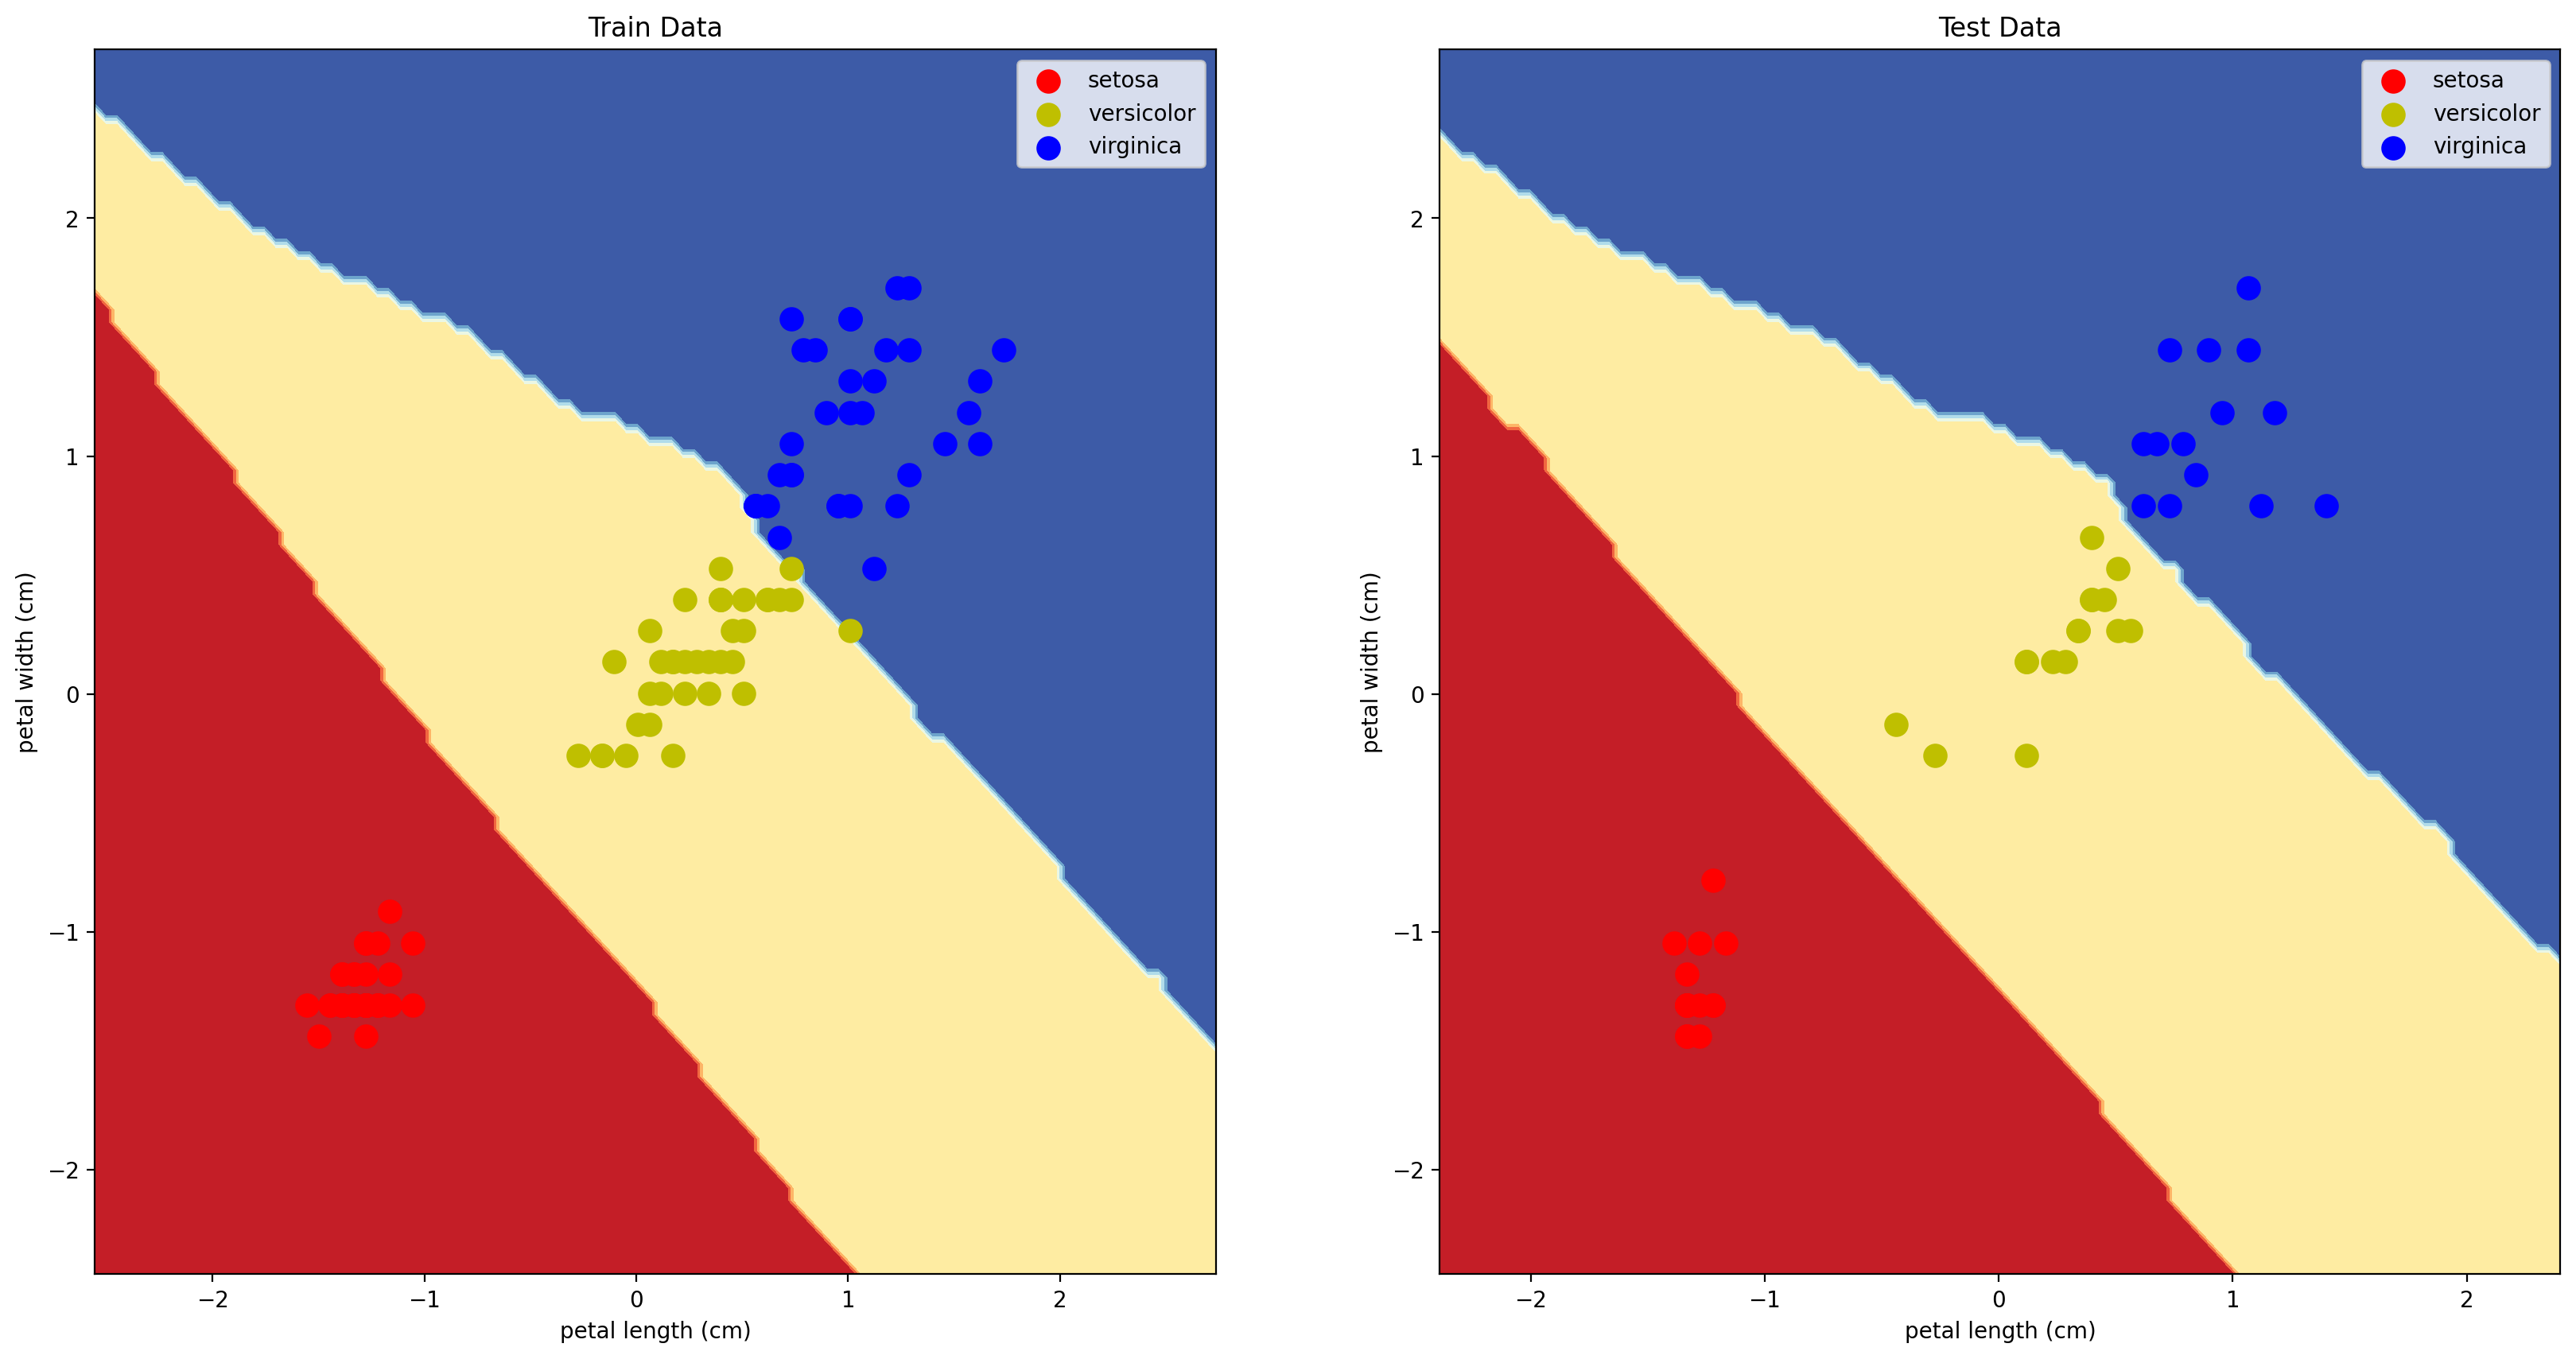

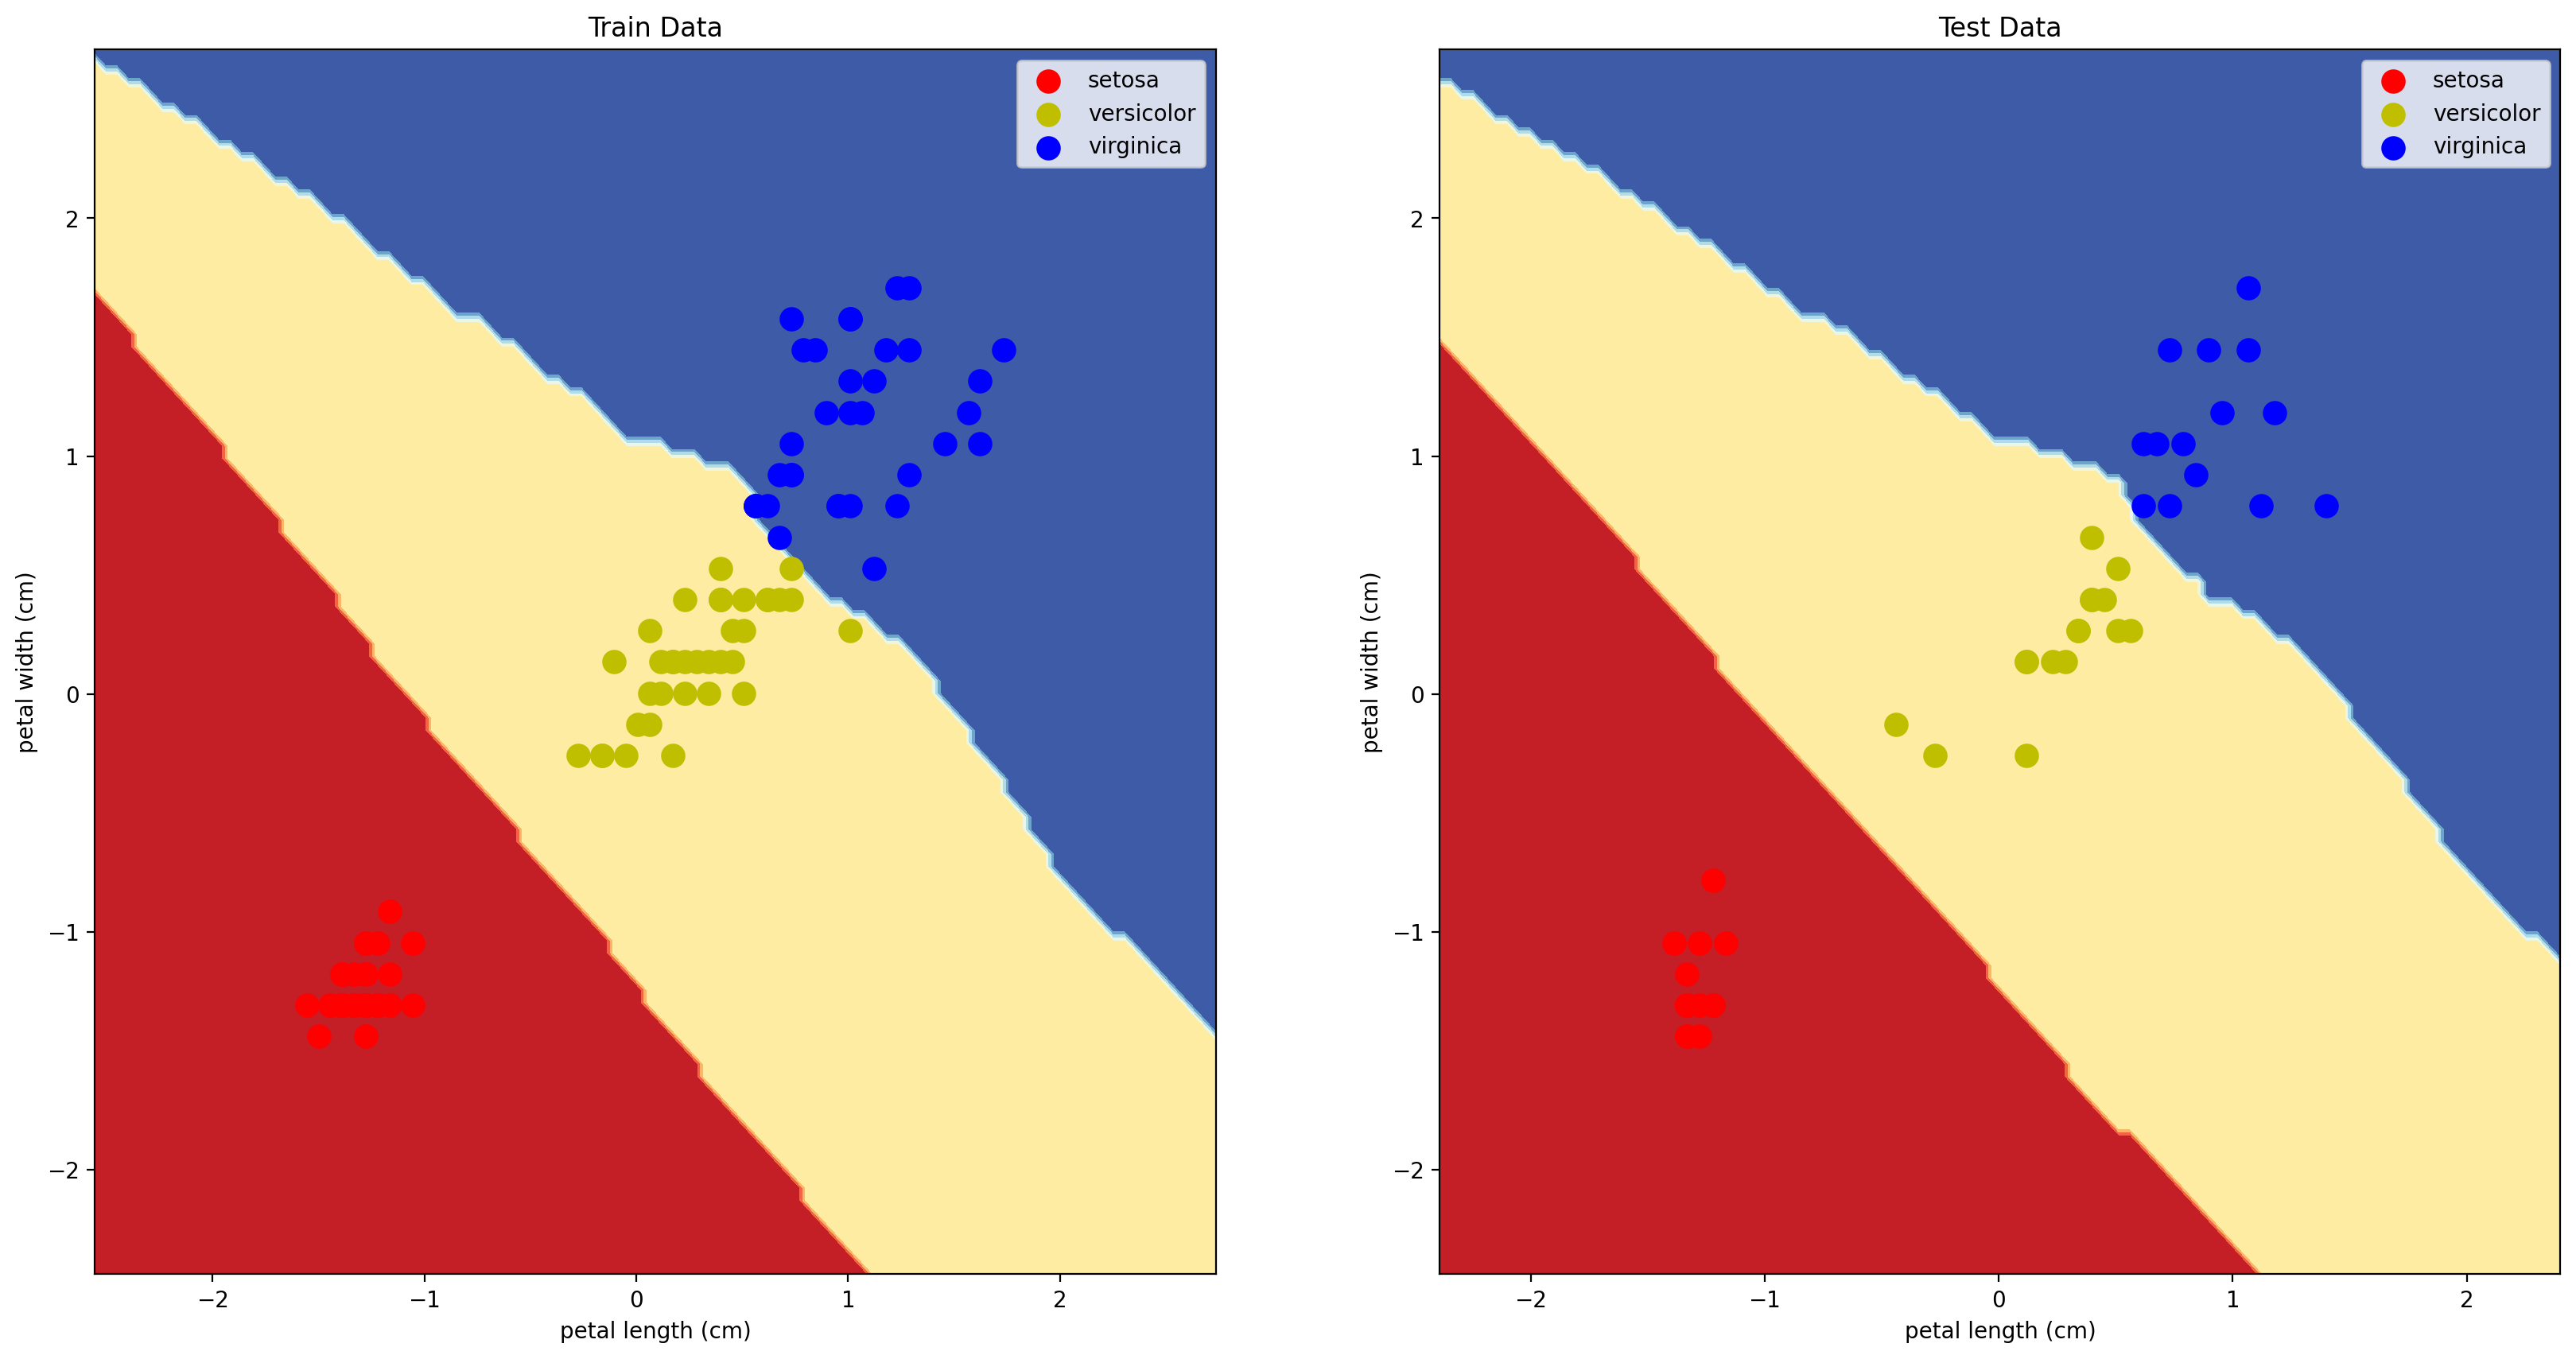

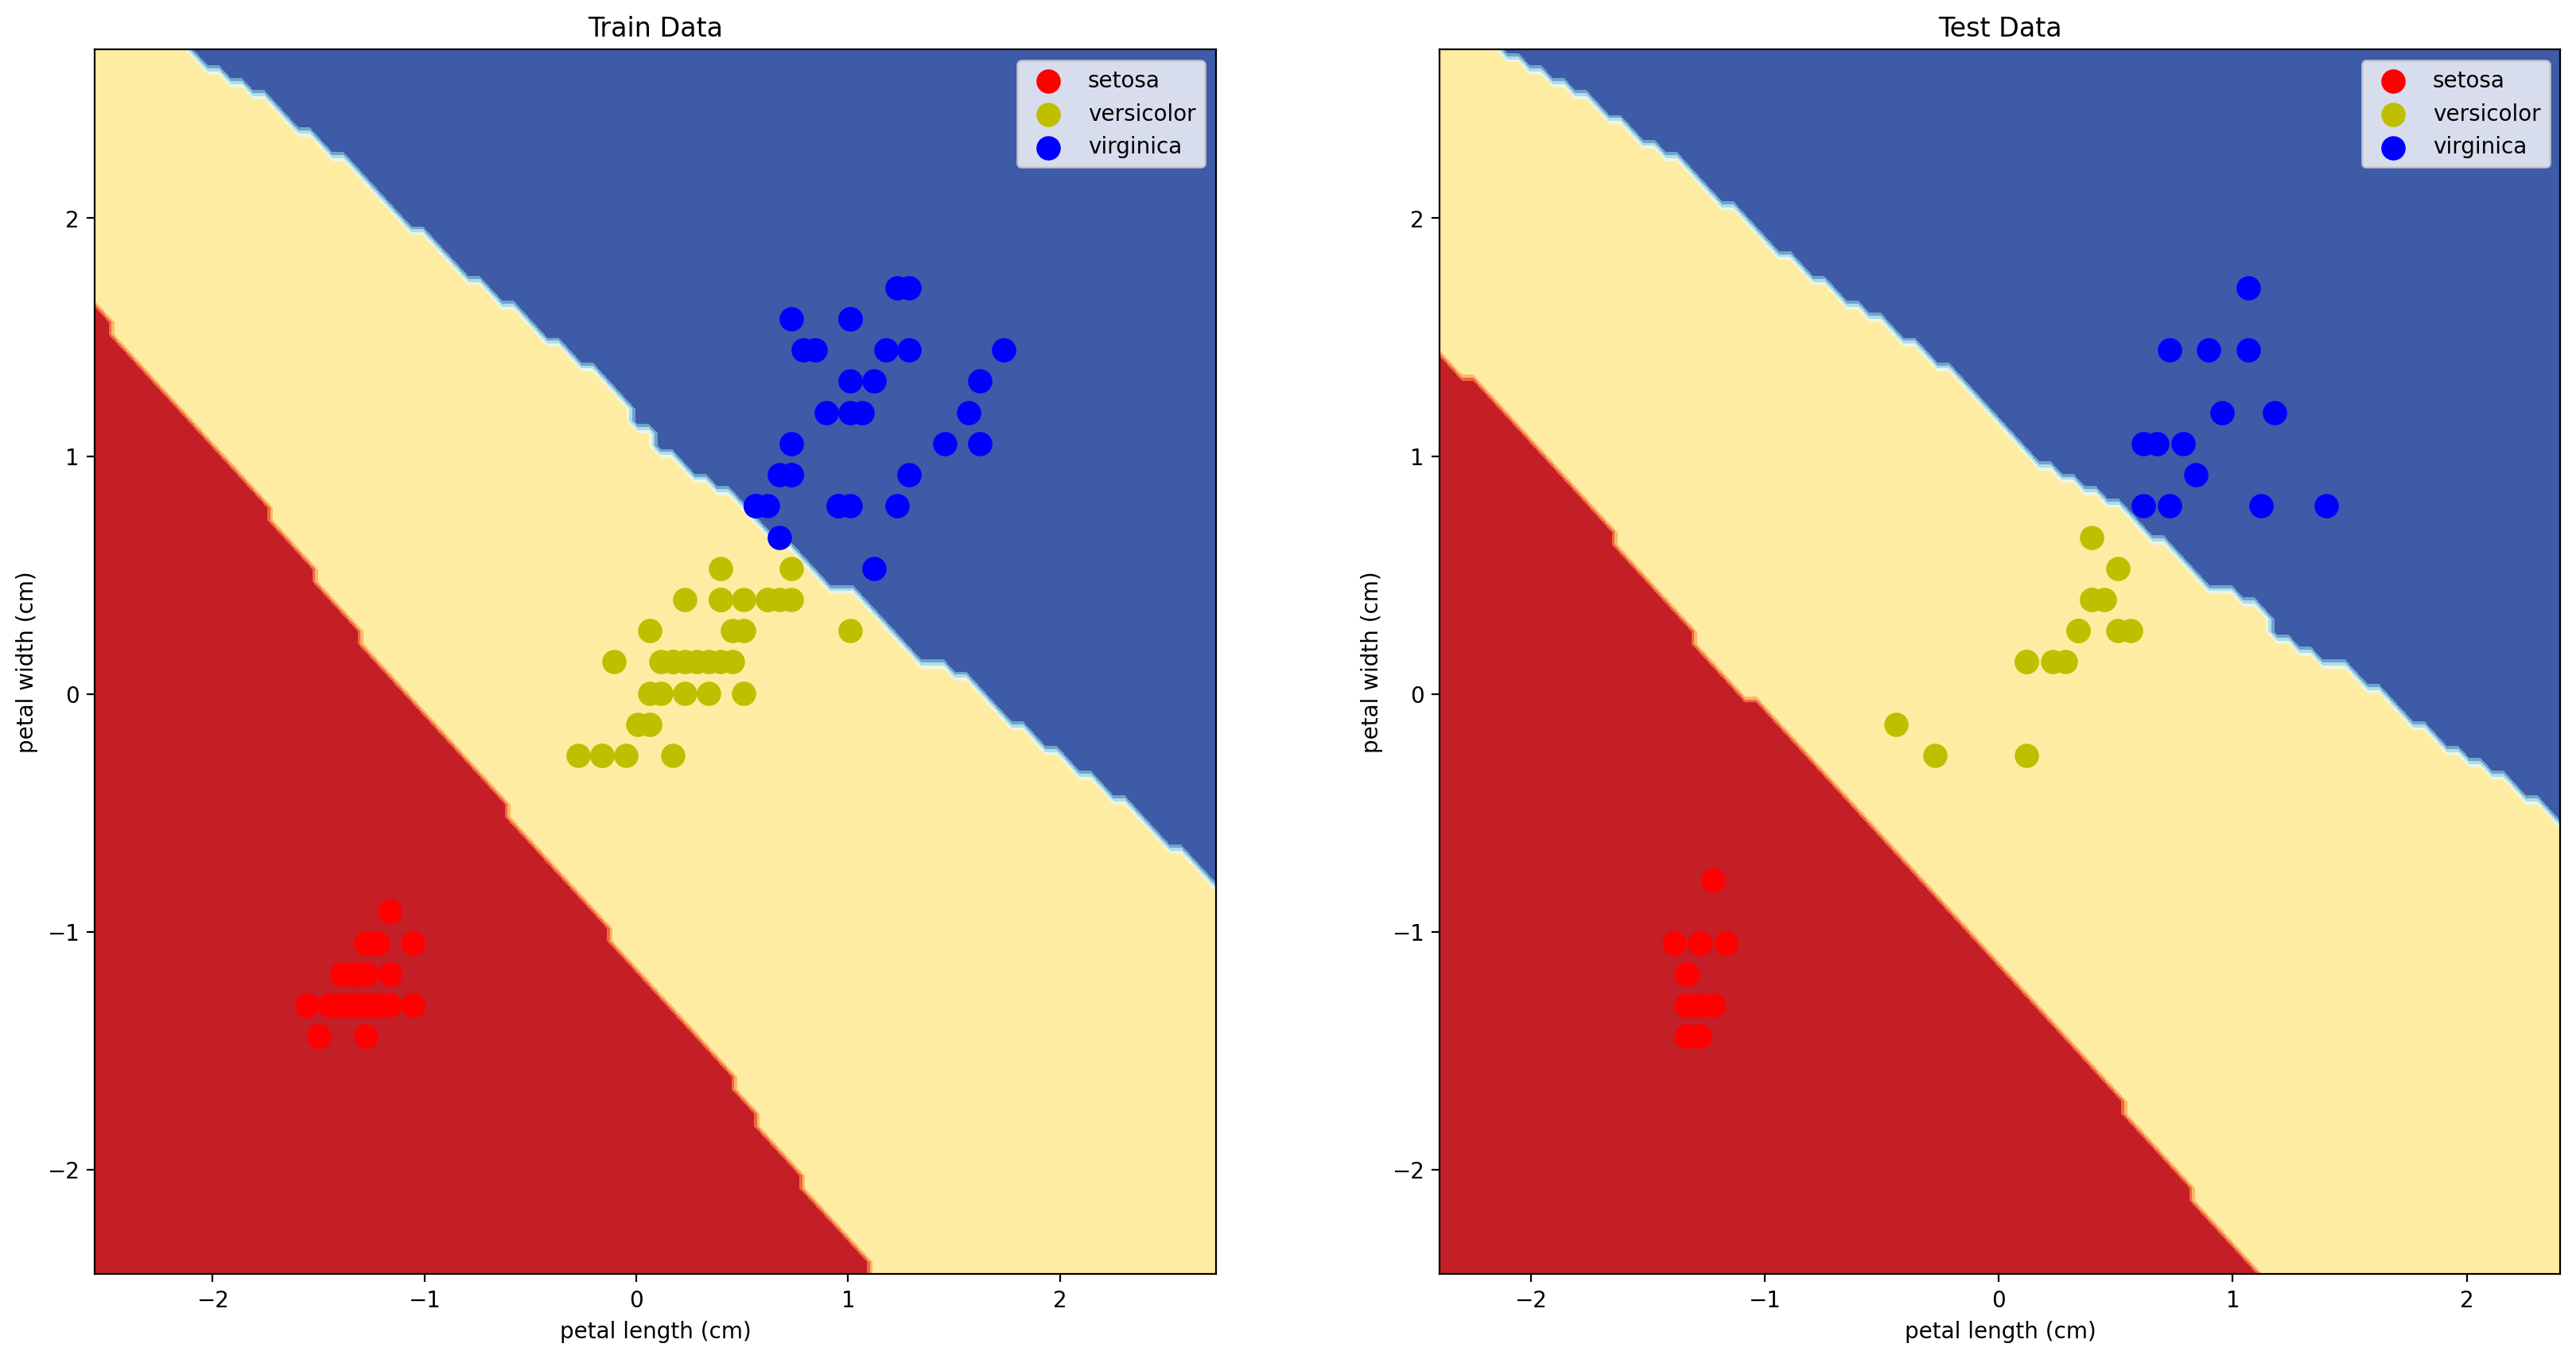

In [114]:
for i, e in enumerate(params_set):
    model = KNeighborsClassifier(**e[1])
    model.fit(X_train_t, y_train)
    pred = model.predict(X_test_t)
    
    print(f'n_neighbors = {e[1]["n_neighbors"]} \n')
    print(metrics.classification_report(y_test, pred))
    print('--'*50)
    surf_plot(X_train_t, X_test_t, model)